In [1]:
# https://www.kaggle.com/datasets/jockeroika/life-style-data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import math

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Age :  Age of the participant (in years).
# Gender : Biological gender (Male/Female).
# Weight (kg) : Weight of the individual in kilograms.
# Height (m) : Height of the individual in meters.
# Max_BPM : Maximum heart rate recorded during a workout session.  
# Avg_BPM : Average heart rate maintained during the session.
# Resting_BPM : Resting heart rate before starting the workout.
# Session_Duration (hours) : Duration of the workout session in hours.
# Calories_Burned : Total calories burned during the session.
# Workout_Type : Type of workout performed (e.g., Strength, HIIT, Cardio).
# Fat_Percentage : 	Body fat percentage of the individual.
# Water_Intake (liters) : Average daily water consumption in liters.
# Workout_Frequency (days/week) : Number of workout days per week.
# Experience_Level : Fitness experience level (1=Beginner, 2=Intermediate, 3=Advanced).
# BMI : Body Mass Index, a measure of body fat based on height and weight.
# Daily meals frequency : Number of meals consumed daily.
# Physical exercise : Indicates the type or frequency of physical activity.
# Carbs : Daily carbohydrate intake (grams).
# Proteins : Daily protein intake (grams).
# Fats : Daily fat intake (grams).
# Calories : Total daily calorie intake from food.
# meal_name : Name of the meal (e.g., Breakfast, Lunch, Dinner).
# meal_type : Type of meal (e.g., Snack, Main, Beverage). 
# diet_type : Type of diet followed (e.g., Keto, Vegan, Balanced).
# sugar_g : Sugar content in grams per meal.
# sodium_mg : Sodium content in milligrams per meal.
# cholesterol_mg : Cholesterol content in milligrams per meal.
# serving_size_g : Portion size of the meal in grams.
# cooking_method : Cooking method used (e.g., Boiled, Fried, Grilled). 
# prep_time_min : Preparation time in minutes.
# cook_time_min : Cooking time in minutes.
# rating : Meal or workout rating (typically 1–5 scale). 
# is_healthy : Boolean indicator (True/False) of whether the meal/workout is healthy.
# Name of Exercise : Name of the exercise performed.
# Sets : Number of sets completed in the exercise.
# Reps : Number of repetitions per set.
# Benefit : Description of the exercise’s physical benefit.
# Burns Calories (per 30 min) : Estimated calories burned in 30 minutes of that exercise.
# Target Muscle Group : Main muscle group targeted by the exercise.
# Equipment Needed : Equipment required to perform the exercise.
# Difficulty Level : Exercise difficulty level (Beginner, Intermediate, Advanced).
# Body Part : Primary body part involved (e.g., Arms, Legs, Chest).
# Type of Muscle : 	Type of muscle engaged (e.g., Upper, Core, Grip Strength).
# Workout : Specific workout or exercise name.

In [4]:
df = pd.read_csv("Final_data.csv")

In [5]:
pd.set_option('display.max_columns', len(df))
df.head()

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0  34.91    Male        65.27        1.62   188.58   157.65        69.05   
1  23.37  Female        56.41        1.55   179.43   131.75        73.18   
2  33.20  Female        58.98        1.67   175.04   123.95        54.96   
3  38.69  Female        93.78        1.70   191.21   155.10        50.07   
4  45.09    Male        52.42        1.88   193.58   152.88        70.84   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.00          1080.90     Strength       26.800377   
1                      1.37          1809.91         HIIT       27.655021   
2                      0.91           802.26       Cardio       24.320821   
3                      1.10          1450.79         HIIT       32.813572   
4                      1.08          1166.40     Strength       17.307319   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                   1.50                           3.99              2.01   
1                   1.90                           4.00              2.01   
2                   1.88                           2.99              1.02   
3                   2.50                           3.99              1.99   
4                   2.91                           4.00              2.00   

     BMI  Daily meals frequency  Physical exercise   Carbs  Proteins   Fats  \
0  24.87                   2.99               0.01  267.68    106.05  71.63   
1  23.48                   3.01               0.97  214.32     85.41  56.97   
2  21.15                   1.99              -0.02  246.04     98.11  65.48   
3  32.45                   3.00               0.04  203.22     80.84  54.56   
4  14.83                   3.00               3.00  332.79    133.05  88.43   

   Calories meal_name  meal_type   diet_type  sugar_g  sodium_mg  \
0    1806.0     Other      Lunch       Vegan    31.77    1729.94   
1    1577.0     Other      Lunch  Vegetarian    12.34     693.08   
2    1608.0     Other  Breakfast       Paleo    42.81    2142.48   
3    2657.0     Other      Lunch       Paleo     9.34     123.20   
4    1470.0     Other  Breakfast       Vegan    23.78    1935.11   

   cholesterol_mg  serving_size_g cooking_method  prep_time_min  \
0          285.05          120.47        Grilled          16.24   
1          300.61          109.15          Fried          16.47   
2          215.42          399.43         Boiled          54.35   
3            9.70          314.31          Fried          27.73   
4          116.89           99.22          Baked          34.16   

   cook_time_min  rating   Name of Exercise  Sets   Reps  \
0         110.79    1.31   Decline Push-ups  4.99  20.91   
1          12.01    1.92        Bear Crawls  4.01  16.15   
2           6.09    4.70               Dips  5.00  21.90   
3         103.72    4.85  Mountain Climbers  4.01  16.92   
4          46.55    3.07        Bicep Curls  4.99  15.01   

                                           Benefit  \
0             Improves shoulder health and posture   
1                            Strengthens lower abs   
2                            Builds chest strength   
3  Improves coordination and cardiovascular health   
4      Targets obliques and improves core rotation   

   Burns Calories (per 30 min)    Target Muscle Group        Equipment Needed  \
0                       342.58     Shoulders, Triceps           Cable Machine   
1                       357.16  Back, Core, Shoulders             Step or Box   
2                       359.63     Quadriceps, Glutes             Step or Box   
3                       351.65       Biceps, Forearms  Parallel Bars or Chair   
4                       329.36         Chest, Triceps                    Wall   

  Difficulty Level  Body Part Type of Muscle                 Workout  \
0         Advanced       Legs           Lats          Dumbbell flyes   
1     Intermediate

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             20000 non-null  float64
 1   Gender                          20000 non-null  object 
 2   Weight (kg)                     20000 non-null  float64
 3   Height (m)                      20000 non-null  float64
 4   Max_BPM                         20000 non-null  float64
 5   Avg_BPM                         20000 non-null  float64
 6   Resting_BPM                     20000 non-null  float64
 7   Session_Duration (hours)        20000 non-null  float64
 8   Calories_Burned                 20000 non-null  float64
 9   Workout_Type                    20000 non-null  object 
 10  Fat_Percentage                  20000 non-null  float64
 11  Water_Intake (liters)           20000 non-null  float64
 12  Workout_Frequency (days/week)   

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isnull().sum().sum()

np.int64(0)

# EDA (Exploratory Data Analysis)

In [9]:
numerical_columns = [col for col in df.columns if df[col].dtype != "O"]
categorical_columns = [col for col in df.columns if df[col].dtype == "O"]

In [10]:
def plot_all_histograms(df):
    num_cols = numerical_columns
    n_cols = 4
    n_rows = math.ceil(len(num_cols) / n_cols)

    plt.figure(figsize=(5 * n_cols, 4 * n_rows))

    for i, col in enumerate(num_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(data=df, x=col, kde=True, bins=30, hue="Gender", color="#1f77b4", edgecolor="White", alpha=0.6, multiple="dodge", shrink=0.8)
        plt.title(col, fontweight="bold")
        plt.xlabel("")
        plt.ylabel("")
        
    plt.suptitle("Distribution of Numerical Features by Gender", fontsize=18, fontweight="bold", color="black" ,y=1.0)
    plt.tight_layout()
    plt.show()

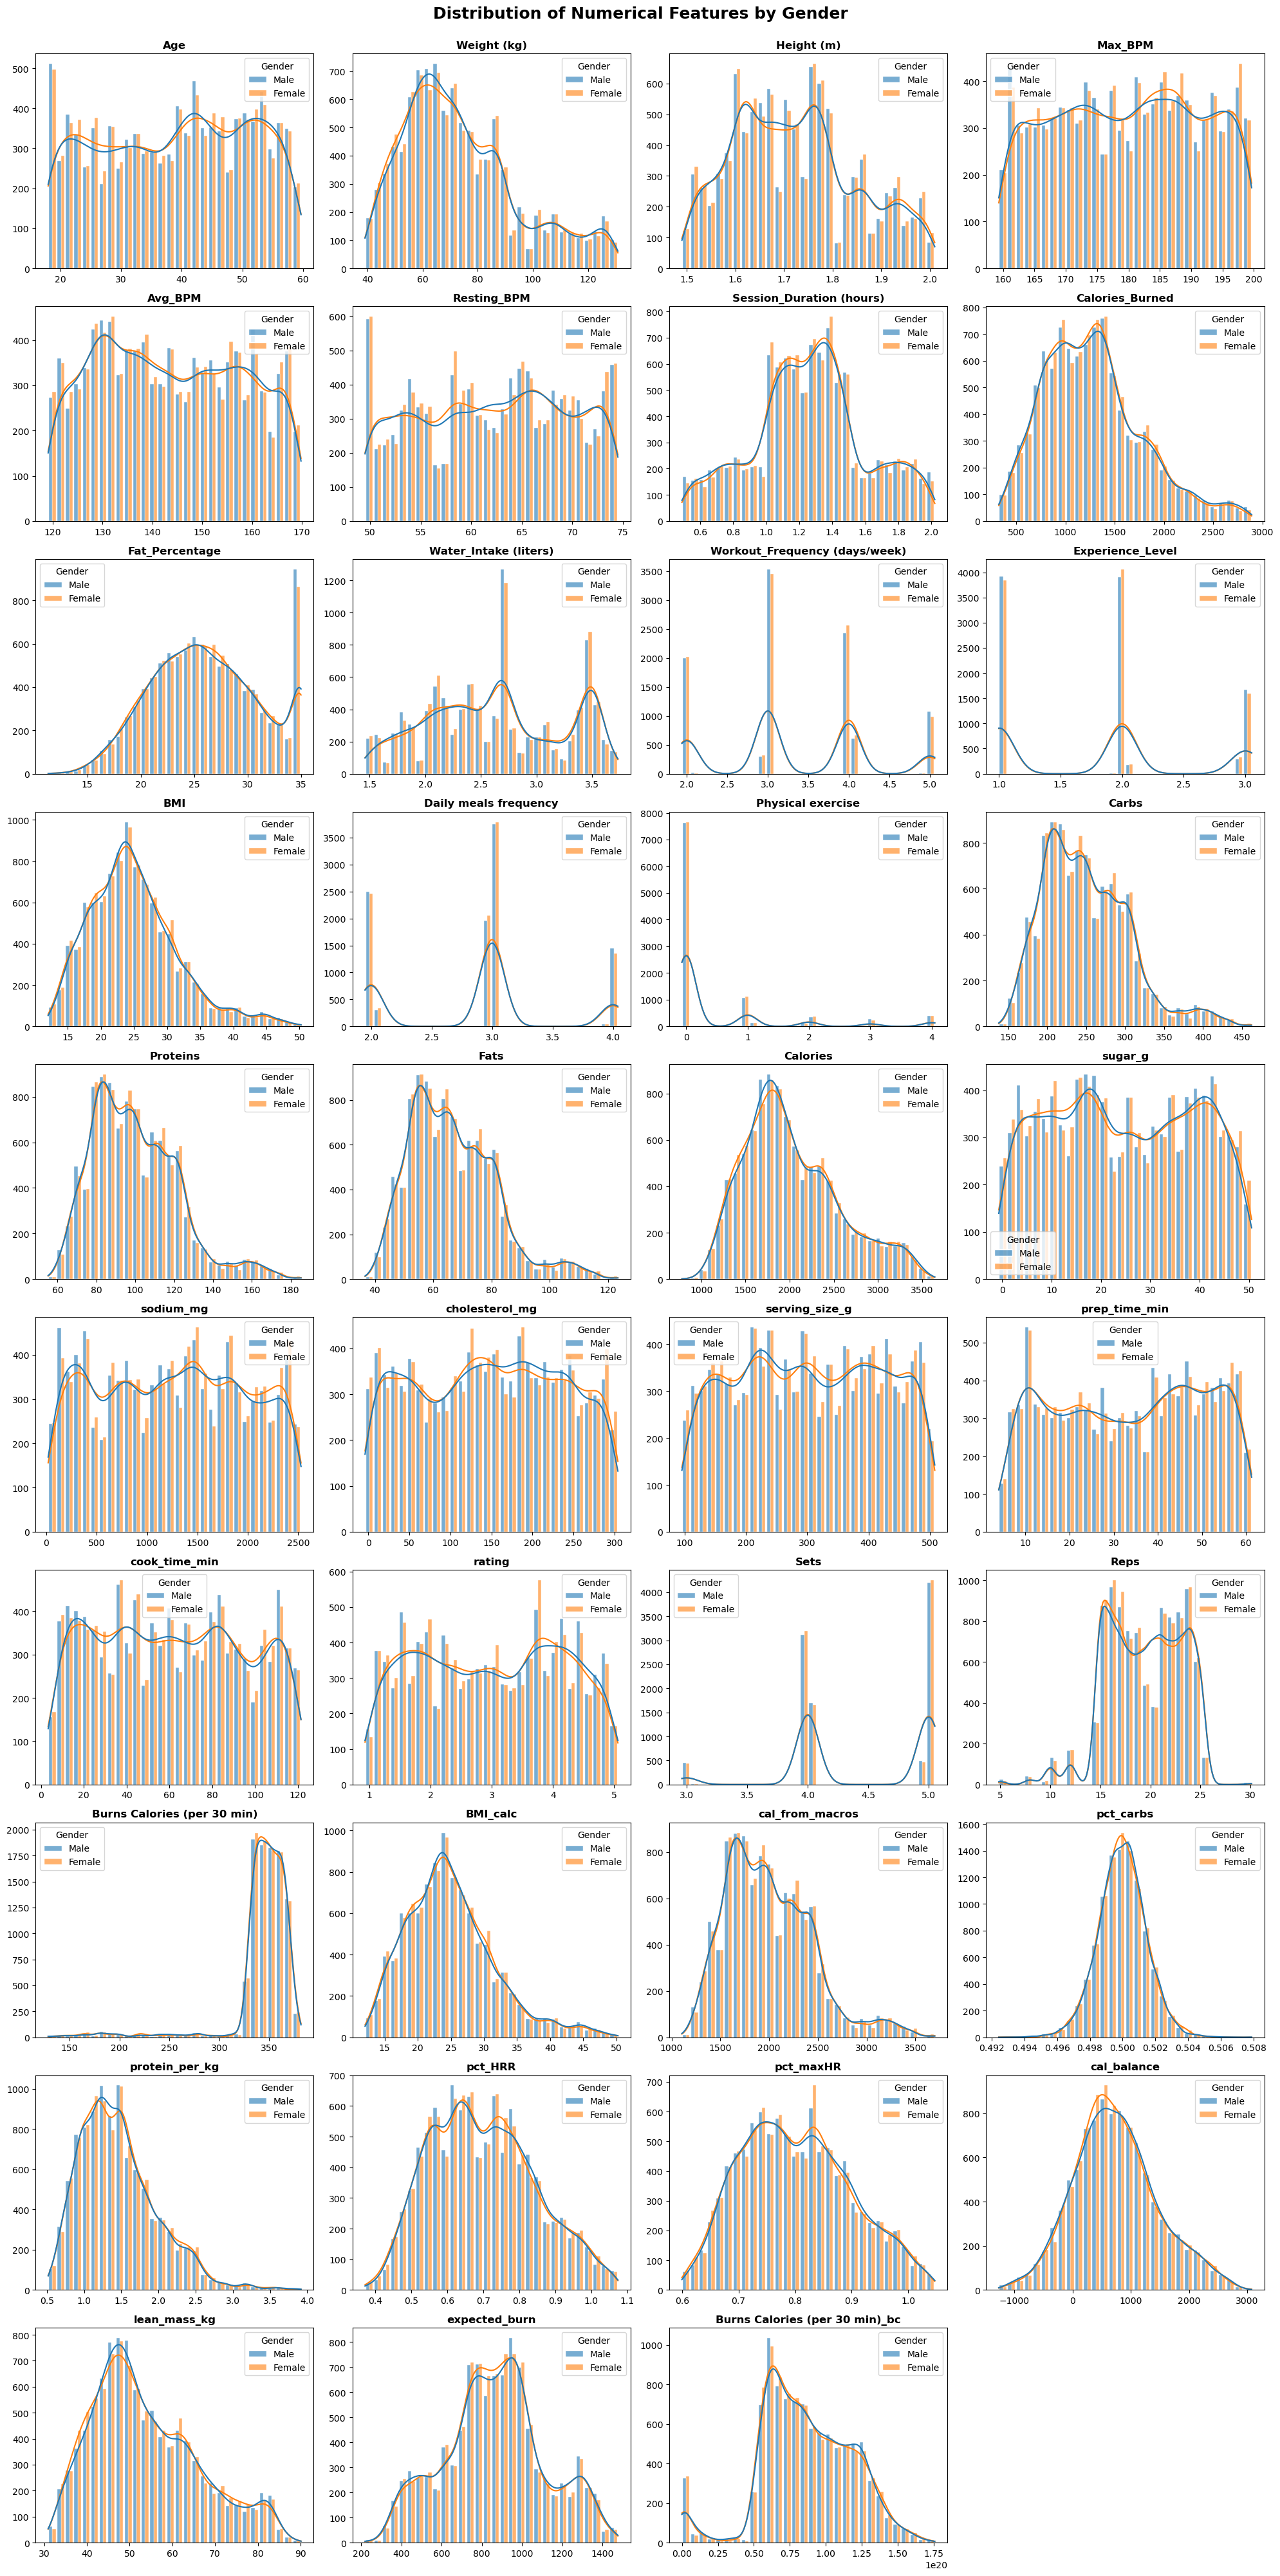

In [11]:
plot_all_histograms(df)

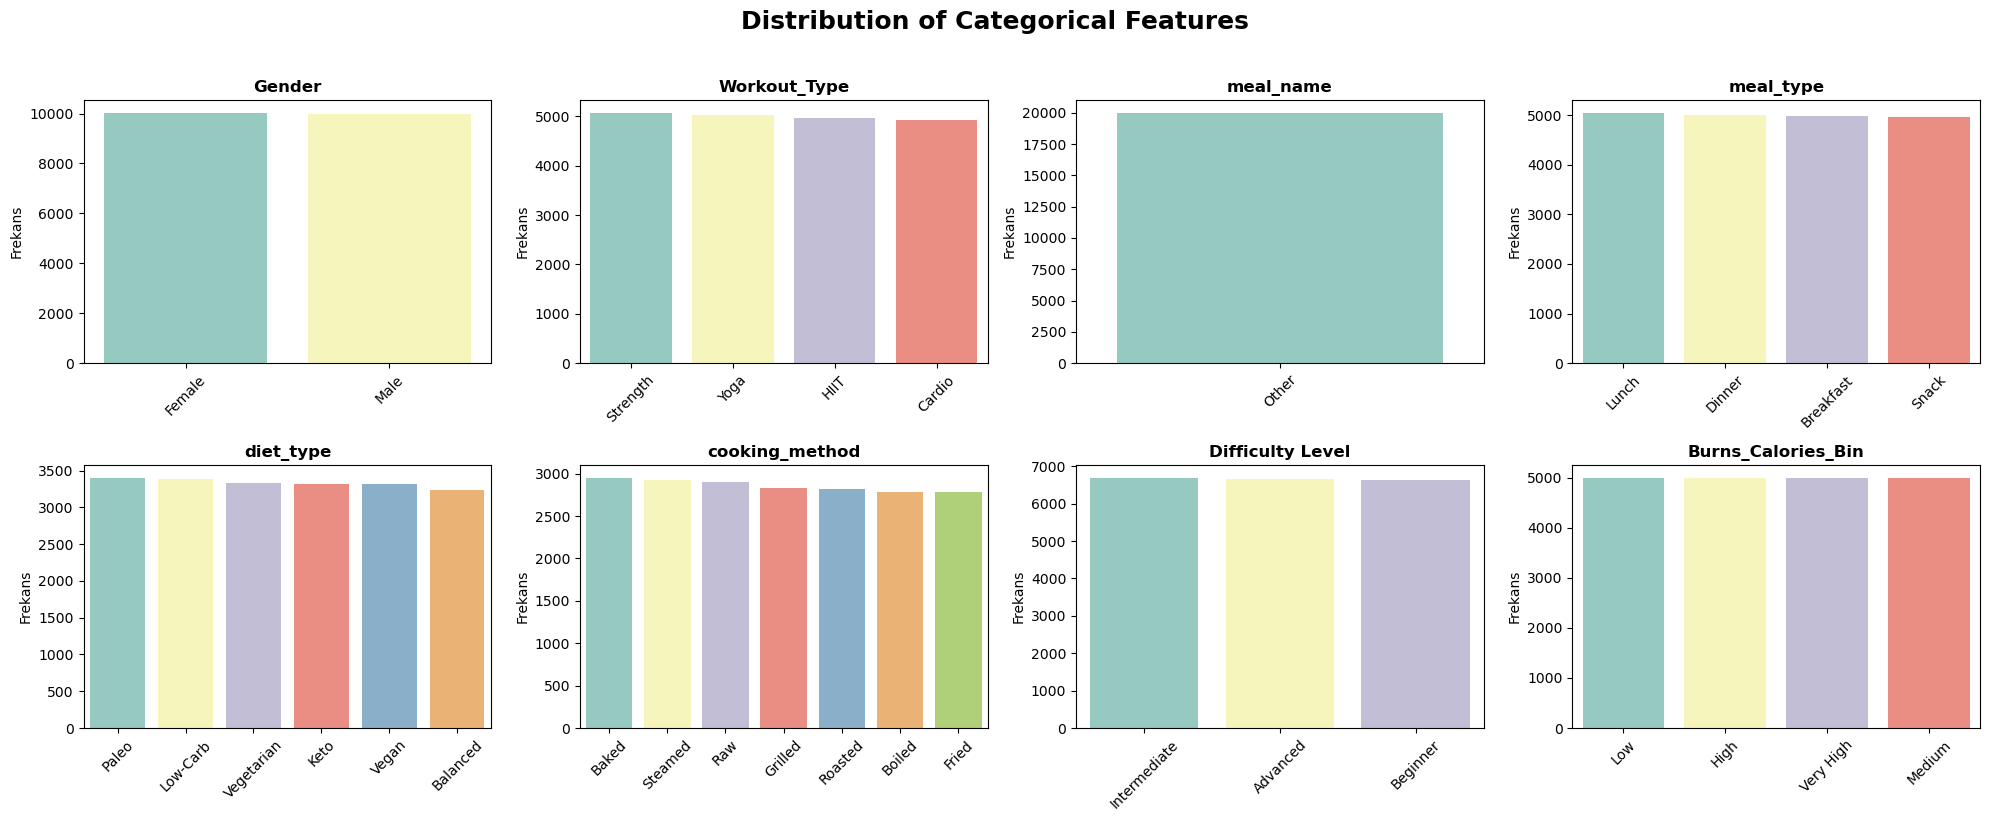

In [12]:
def plot_all_categorical_counts(df, categorical_columns):
    n_cols = 4
    n_rows = math.ceil(len(categorical_columns) / n_cols)

    plt.figure(figsize=(5 * n_cols, 4 * n_rows))
    palette = sns.color_palette("Set3")

    for i, col in enumerate(categorical_columns, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.countplot(data=df, x=col, palette=palette, order=df[col].value_counts().index)
        plt.title(col, fontweight="bold")
        plt.xlabel("")
        plt.ylabel("Frekans")
        plt.xticks(rotation=45)
        
        plt.suptitle("Distribution of Categorical Features", fontsize=18, fontweight="bold", color="black", y=1.02)

    plt.tight_layout()
    plt.show()


columns = ["Gender", "Workout_Type", "meal_name", "meal_type", "diet_type", "cooking_method", "Difficulty Level", "Burns_Calories_Bin"]
plot_all_categorical_counts(df, columns)

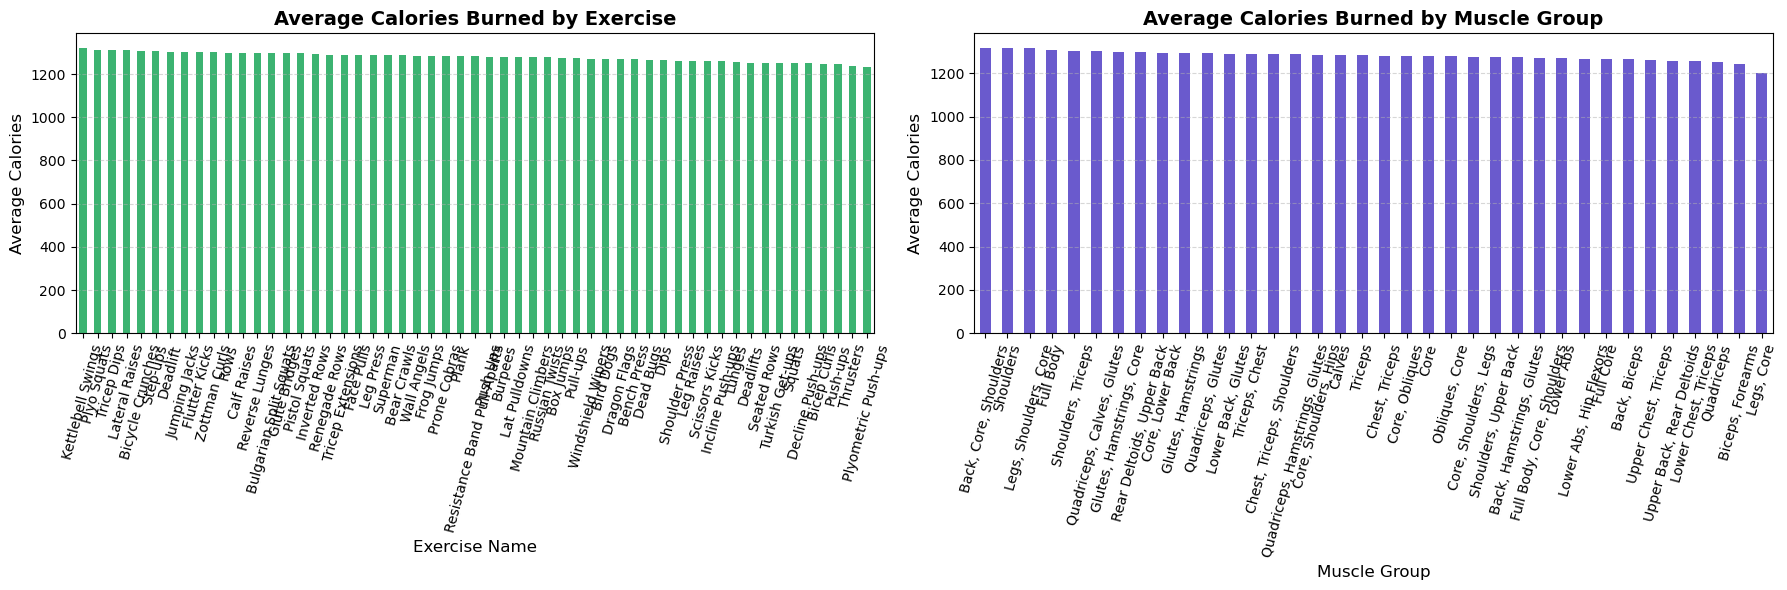

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Chart 1: Name of Exercise

# 1. Average Calories by Exercise Name
exercise_calories = df.groupby("Name of Exercise")["Calories_Burned"].mean().sort_values(ascending=False)
exercise_calories.plot(kind="bar", ax=axes[0], color="mediumseagreen")
axes[0].set_title("Average Calories Burned by Exercise", fontsize=14, fontweight="bold", color="black")
axes[0].set_ylabel("Average Calories", fontsize=12)
axes[0].set_xlabel("Exercise Name", fontsize=12)
axes[0].tick_params(axis='x', rotation=75)
axes[0].grid(axis="y", linestyle="--", alpha=0.5)

# Chart 2: Target Muscle Group

# 2. Average Calories by Target Muscle Group
group_avg = df.groupby("Target Muscle Group")["Calories_Burned"].mean().sort_values(ascending=False)
group_avg.plot(kind="bar", ax=axes[1], color="slateblue")
axes[1].set_title("Average Calories Burned by Muscle Group", fontsize=14, fontweight="bold", color="black")
axes[1].set_ylabel("Average Calories", fontsize=12)
axes[1].set_xlabel("Muscle Group", fontsize=12)
axes[1].tick_params(axis='x', rotation=75)
axes[1].grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

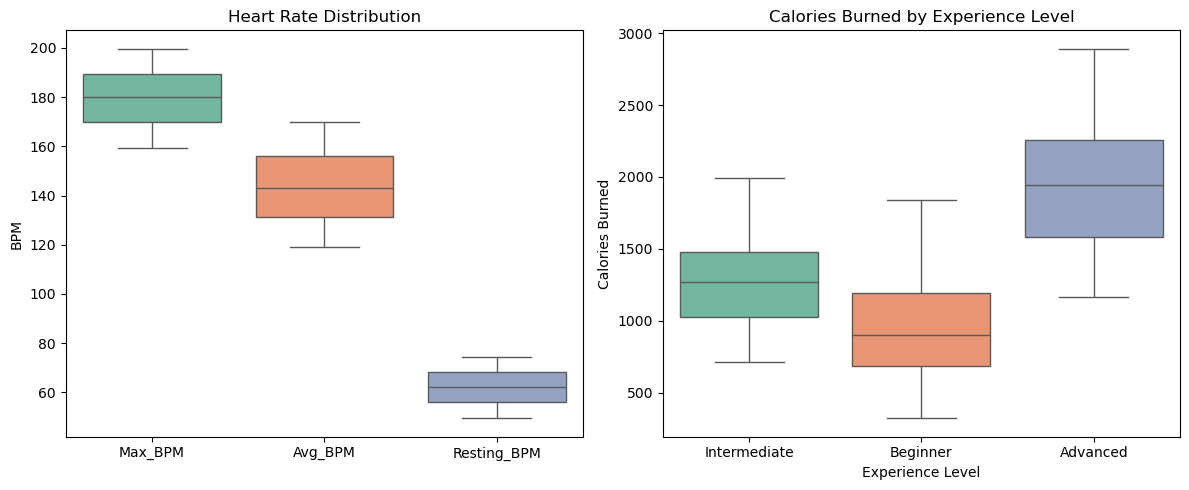

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot for Heart Rate Distribution
sns.boxplot(data=df[["Max_BPM", "Avg_BPM", "Resting_BPM"]], palette="Set2", ax=axes[0])
axes[0].set_title("Heart Rate Distribution")
axes[0].set_ylabel("BPM")

# Boxplot for Calories Burned by Experience Level
experience_labels = df["Experience_Level"].round().map({1: "Beginner", 2: "Intermediate", 3: "Advanced"})
sns.boxplot(x=experience_labels, y=df["Calories_Burned"], palette="Set2", ax=axes[1])
axes[1].set_title("Calories Burned by Experience Level")
axes[1].set_xlabel("Experience Level")
axes[1].set_ylabel("Calories Burned")

plt.tight_layout()
plt.show()

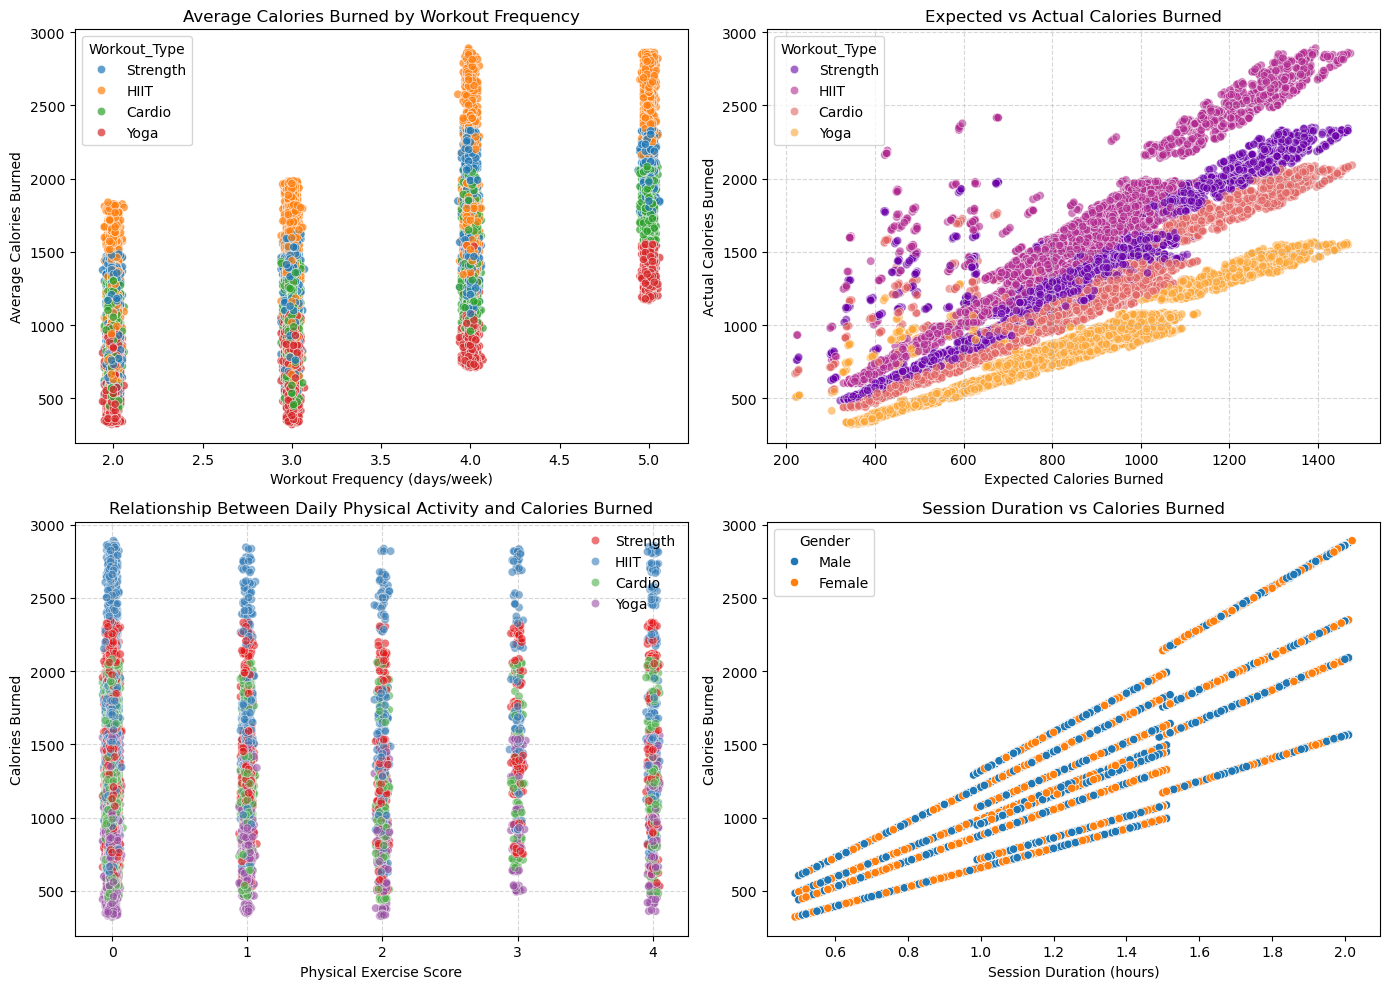

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# 1. Average Calories Burned by Workout Frequency
sns.scatterplot(data=df, x="Workout_Frequency (days/week)", y="Calories_Burned", hue="Workout_Type", alpha=0.7, ax=axes[0])
axes[0].set_title("Average Calories Burned by Workout Frequency")
axes[0].set_xlabel("Workout Frequency (days/week)")
axes[0].set_ylabel("Average Calories Burned")

# 2. Expected vs Actual Calories Burned
sns.scatterplot(data=df, x="expected_burn", y="Calories_Burned", hue="Workout_Type", alpha=0.6, palette="plasma", ax=axes[1])
axes[1].set_title("Expected vs Actual Calories Burned")
axes[1].set_xlabel("Expected Calories Burned")
axes[1].set_ylabel("Actual Calories Burned")
axes[1].grid(True, linestyle="--", alpha=0.5)

# 3. Relationship Between Daily Physical Activity and Calories Burned
sns.scatterplot(data=df, x="Physical exercise", y="Calories_Burned", hue="Workout_Type", alpha=0.6, palette="Set1", ax=axes[2])
axes[2].set_title("Relationship Between Daily Physical Activity and Calories Burned")
axes[2].set_xlabel("Physical Exercise Score")
axes[2].set_ylabel("Calories Burned")
axes[2].grid(True, linestyle="--", alpha=0.5)

legend = axes[2].legend(loc="upper right", fontsize=10, markerscale=1, handlelength=1.2, frameon=False)

# 4. Session Duration vs Calories Burned
sns.scatterplot(data=df, x="Session_Duration (hours)", y="Calories_Burned", hue="Gender", ax=axes[3])
axes[3].set_title("Session Duration vs Calories Burned")
axes[3].set_xlabel("Session Duration (hours)")
axes[3].set_ylabel("Calories Burned")

plt.tight_layout()
plt.show()

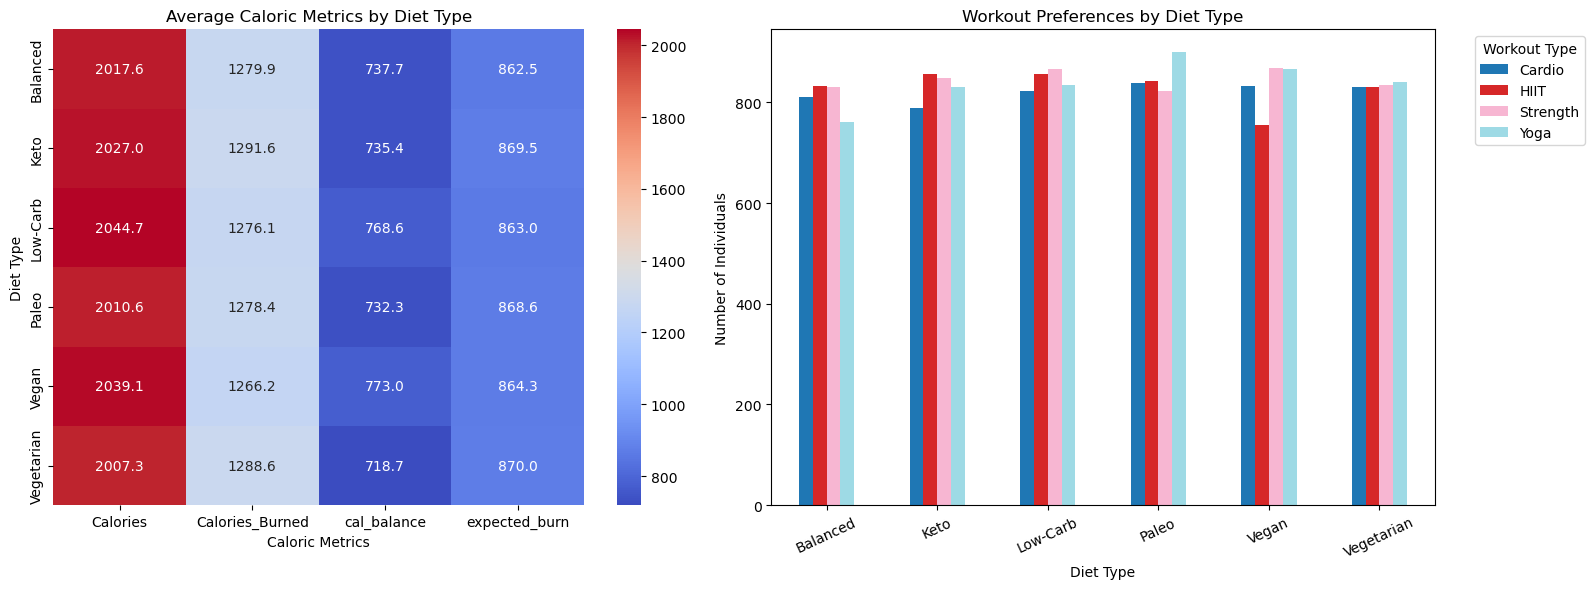

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# Heatmap
cal_df = df[['diet_type', 'Calories', 'Calories_Burned', 'cal_balance', 'expected_burn']].copy()
heat_df = cal_df.groupby('diet_type').mean().round(1)

sns.heatmap(heat_df, annot=True, cmap='coolwarm', fmt='.1f', ax=axes[0])
axes[0].set_title('Average Caloric Metrics by Diet Type')
axes[0].set_ylabel('Diet Type')
axes[0].set_xlabel('Caloric Metrics')

# Bar chart
workout_diet_counts = df.groupby(['diet_type', 'Workout_Type']).size().unstack(fill_value=0)

workout_diet_counts.plot(kind='bar', colormap='tab20', ax=axes[1])
axes[1].set_title('Workout Preferences by Diet Type')
axes[1].set_ylabel('Number of Individuals')
axes[1].set_xlabel('Diet Type')
axes[1].legend(title='Workout Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=25)

plt.tight_layout()
plt.show()

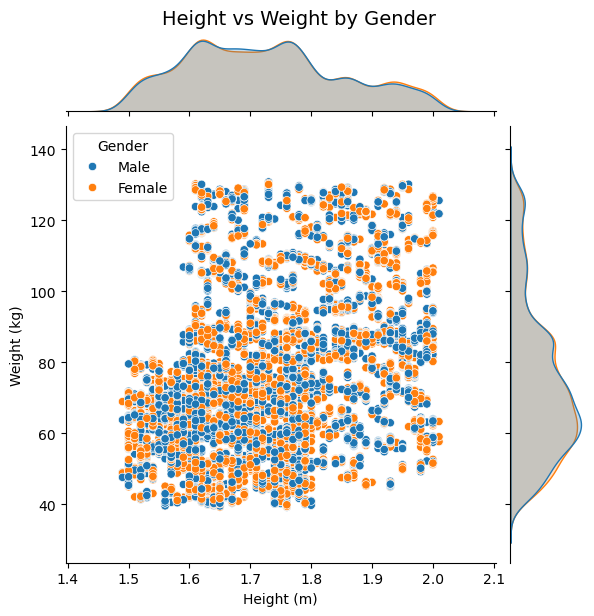

In [17]:
sns.jointplot(data=df, x="Height (m)", y="Weight (kg)", kind="scatter", hue="Gender")
plt.suptitle("Height vs Weight by Gender", fontsize=14, y=1.02)
plt.show()

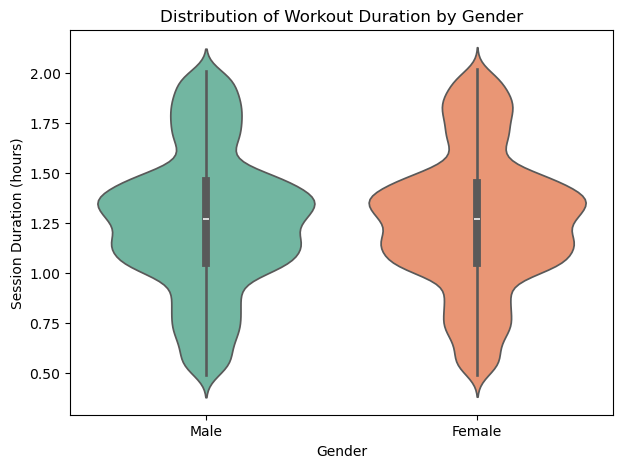

In [18]:
plt.figure(figsize=(7,5))
sns.violinplot(x="Gender", y="Session_Duration (hours)", data=df, palette="Set2")
plt.title("Distribution of Workout Duration by Gender")
plt.xlabel("Gender")
plt.ylabel("Session Duration (hours)")
plt.show()

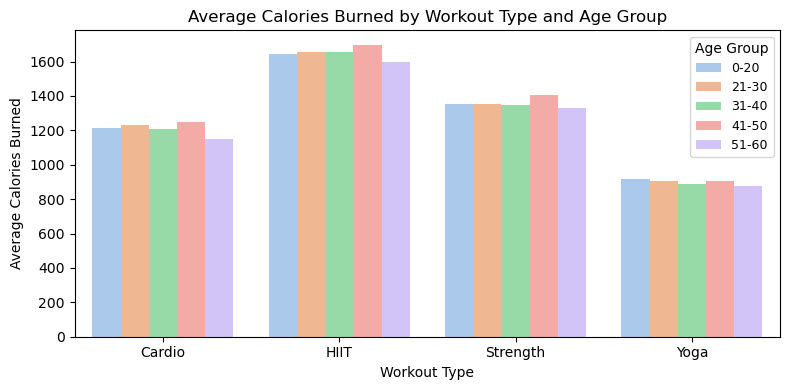

In [19]:
avg_calories = (
    df.assign(Age_Group=pd.cut(df["Age"], bins=[0, 20, 30, 40, 50, 60], labels=["0-20", "21-30", "31-40", "41-50", "51-60"]))
    .groupby(["Workout_Type", "Age_Group"])["Calories_Burned"]
    .mean()
    .reset_index())


plt.figure(figsize=(8,4))
sns.barplot(data=avg_calories, x="Workout_Type", y="Calories_Burned", hue="Age_Group", palette="pastel")


plt.title("Average Calories Burned by Workout Type and Age Group")
plt.xlabel("Workout Type")
plt.ylabel("Average Calories Burned")

plt.legend(title="Age Group", loc="upper right", fontsize=9)
plt.tight_layout()
plt.show()

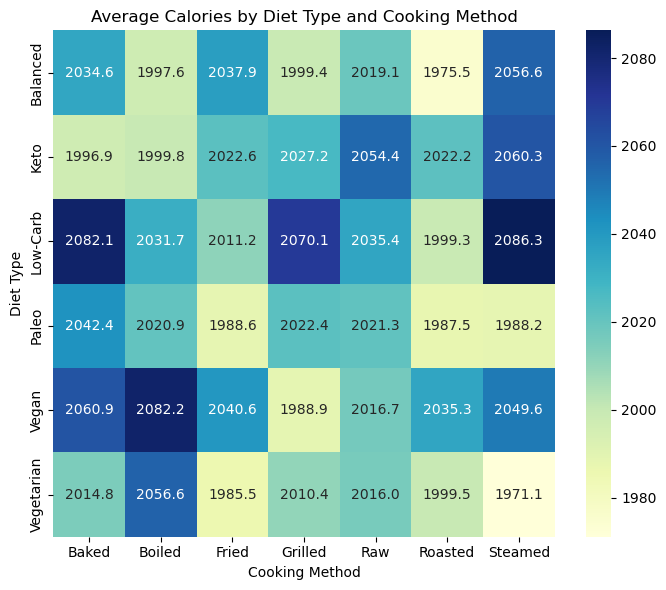

In [20]:
pivot = df.pivot_table(values='Calories', index='diet_type', columns='cooking_method', aggfunc='mean').round(1)

plt.figure(figsize=(7,6))
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Average Calories by Diet Type and Cooking Method')
plt.xlabel('Cooking Method')
plt.ylabel('Diet Type')
plt.tight_layout()
plt.show()

In [21]:
df.describe()

Age   Weight (kg)    Height (m)       Max_BPM       Avg_BPM  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean      38.851453     73.898832      1.723093    179.889702    143.704306   
std       12.114580     21.173010      0.127033     11.510805     14.267688   
min       18.000000     39.180000      1.490000    159.310000    119.070000   
25%       28.170000     58.160000      1.620000    170.057500    131.220000   
50%       39.865000     70.000000      1.710000    180.140000    142.990000   
75%       49.630000     86.100000      1.800000    189.425000    156.060000   
max       59.670000    130.770000      2.010000    199.640000    169.840000   

        Resting_BPM  Session_Duration (hours)  Calories_Burned  \
count  20000.000000              20000.000000     20000.000000   
mean      62.195813                  1.259446      1280.109600   
std        7.289351                  0.341336       502.228982   
min       49.490000                  0.490000       323.110000   
25%       55.960000                  1.050000       910.800000   
50%       62.200000                  1.270000      1231.450000   
75%       68.090000                  1.460000      1553.112500   
max       74.500000                  2.020000      2890.820000   

       Fat_Percentage  Water_Intake (liters)  Workout_Frequency (days/week)  \
count    20000.000000           20000.000000                   20000.000000   
mean        26.101313               2.627485                       3.318629   
std          4.996160               0.604724                       0.911198   
min         11.333134               1.460000                       1.940000   
25%         22.387807               2.170000                       2.980000   
50%         25.822504               2.610000                       3.010000   
75%         29.676026               3.120000                       4.000000   
max         35.000000               3.730000                       5.060000   

       Experience_Level           BMI  Daily meals frequency  \
count      20000.000000  20000.000000           20000.000000   
mean           1.809176     24.921680               2.864804   
std            0.736204      6.701126               0.636649   
min            1.000000     12.040000               1.950000   
25%            1.010000     20.097500               2.020000   
50%            1.990000     24.120000               3.000000   
75%            2.020000     28.560000               3.010000   
max            3.050000     50.230000               4.040000   

       Physical exercise         Carbs     Proteins          Fats  \
count       20000.000000  20000.000000  20000.00000  20000.000000   
mean            0.452503    249.778592     99.91829     66.612172   
std             0.986628     55.108623     22.04367     14.699284   
min            -0.070000    137.720000     55.17000     36.590000   
25%            -0.010000    207.547500     83.04000     55.340000   
50%             0.010000    242.900000     97.14500     64.770000   
75%             0.040000    283.975000    113.64000     75.752500   
max             4.050000    462.490000    185.34000    123.420000   

           Calories       sugar_g     sodium_mg  cholesterol_mg  \
count  20000.000000  20000.000000  20000.000000    20000.000000   
mean    2024.418300     24.531042   1258.139709      148.465602   
std      541.891521     14.446105    716.618987       87.382817   
min      781.000000     -0.670000     19.220000       -3.890000   
25%     1634.000000     11.990000    645.127500       71.970000   
50%     1919.000000     24.060000   1267.650000      149.795000   
75%     2360.000000     37.490000   1850.892500      221.840000   
max     3641.000000     50.510000   2527.270000      303.990000   

       serving_size_g  prep_time_min  cook_time_min        rating  \
count    20000.000000   20000.000000   20000.000000  20000.000000   
mean       302.719499      33.517447      61.502164     

## Outlier Analysis

In [22]:
def count_unique_outlier_rows(df, threshold=1.5):
    numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
    outlier_indices = set()

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_indices.update(outliers.index)

    return len(outlier_indices), df.loc[list(outlier_indices)]

count_unique_outlier_rows(df[numerical_columns], threshold=1.5)[0]  

6667

In [23]:
def find_outlier_iqr(df, threshold = 1.5):
    outlier_summary = {}

    numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        outlier_summary[col] = {
            "outlier_count": outliers.shape[0],
            "outliers_percentage": 100 * outliers.shape[0] / df.shape[0],
            "lower_bound": lower_bound,
            "upper_bound": upper_bound
        }

    return pd.DataFrame(outlier_summary)

find_outlier_iqr(df[numerical_columns], threshold = 1.5)

Age  Weight (kg)  Height (m)    Max_BPM  Avg_BPM  \
outlier_count         0.00       152.00        0.00    0.00000     0.00   
outliers_percentage   0.00         0.76        0.00    0.00000     0.00   
lower_bound          -4.02        16.25        1.35  141.00625    93.96   
upper_bound          81.82       128.01        2.07  218.47625   193.32   

                     Resting_BPM  Session_Duration (hours)  Calories_Burned  \
outlier_count              0.000                     0.000        507.00000   
outliers_percentage        0.000                     0.000          2.53500   
lower_bound               37.765                     0.435        -52.66875   
upper_bound               86.285                     2.075       2516.58125   

                     Fat_Percentage  Water_Intake (liters)  \
outlier_count              1.000000                  0.000   
outliers_percentage        0.005000                  0.000   
lower_bound               11.455478                  0.745   
upper_bound               40.608355                  4.545   

                     Workout_Frequency (days/week)  Experience_Level  \
outlier_count                                 0.00             0.000   
outliers_percentage                           0.00             0.000   
lower_bound                                   1.45            -0.505   
upper_bound                                   5.53             3.535   

                           BMI  Daily meals frequency  Physical exercise  \
outlier_count        530.00000                  0.000           4695.000   
outliers_percentage    2.65000                  0.000             23.475   
lower_bound            7.40375                  0.535             -0.085   
upper_bound           41.25375                  4.495              0.115   

                         Carbs  Proteins       Fats  Calories  sugar_g  \
outlier_count        405.00000   403.000  399.00000    102.00     0.00   
outliers_percentage    2.02500     2.015    1.99500      0.51     0.00   
lower_bound           92.90625    37.140   24.72125    545.00   -26.26   
upper_bound          398.61625   159.540  106.37125   3449.00    75.74   

                     sodium_mg  cholesterol_mg  serving_size_g  prep_time_min  \
outlier_count             0.00           0.000         0.00000        0.00000   
outliers_percentage       0.00           0.000         0.00000        0.00000   
lower_bound           -1163.52        -152.835       -84.74625      -25.44125   
upper_bound            3659.54         446.645       693.82375       91.96875   

                     cook_time_min  rating  Sets   Reps  \
outlier_count              0.00000    0.00   0.0  42.00   
outliers_percentage        0.00000    0.00   0.0   0.21   
lower_bound              -52.86875   -1.15   2.5   5.98   
upper_bound              174.72125    7.09   6.5  33.02   

                     Burns Calories (per 30 min)    BMI_calc  cal_from_macros  \
outlier_count                          893.00000  529.000000        397.00000   
outliers_percentage                      4.46500    2.645000          1.98500   
lower_bound                            303.29125    7.393508        744.63125   
upper_bound                            394.78125   41.264087       3188.34125   

                      pct_carbs  protein_per_kg   pct_HRR  pct_maxHR  \
outlier_count        307.000000      327.000000  0.000000   0.000000   
outliers_percentage    1.535000        1.635000  0.000000   0.000000   
lower_bound            0.496269        0.064992  0.261847   0.515374   
upper_bound            0.503695        2.761797  1.120005   1.081513   

                     cal_balance  lean_mass_kg  expected_burn  \
outlier_count          232.00000     17.000000      46.000000   
outliers_percentage      1.16000      0.085000       0.230000   
lower_bound          -1110.85375     18.559070     266.446575   
upper_bound           2548.57625     87.966983    1460.184375   

                     Burns Calor

In [24]:
def remove_outliers_from_column(df, col, threshold=1.5):

        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [25]:
print("original data shape: ", df.shape)

df1 = remove_outliers_from_column(df, "Burns Calories (per 30 min)")
print("only target column cleaning shape: ", df1.shape)

original data shape:  (20000, 54)
only target column cleaning shape:  (19107, 54)


In [26]:
for col in categorical_columns:
    print(df1[col].value_counts())
    print("*"*25)

Gender
Female    9585
Male      9522
Name: count, dtype: int64
*************************
Workout_Type
Strength    4844
Yoga        4794
HIIT        4772
Cardio      4697
Name: count, dtype: int64
*************************
meal_name
Other    19107
Name: count, dtype: int64
*************************
meal_type
Lunch        4830
Dinner       4792
Breakfast    4748
Snack        4737
Name: count, dtype: int64
*************************
diet_type
Paleo         3242
Low-Carb      3233
Keto          3186
Vegetarian    3184
Vegan         3156
Balanced      3106
Name: count, dtype: int64
*************************
cooking_method
Baked      2819
Steamed    2791
Raw        2782
Grilled    2710
Roasted    2686
Boiled     2660
Fried      2659
Name: count, dtype: int64
*************************
Name of Exercise
Flutter Kicks                  389
Deadlift                       388
Squats                         386
Dips                           376
Dead Bugs                      374
Incline Push-ups    

## Preprocessing Notes:
 - Gender: binary encoding (male=0, female=1)
 - One-hot Encoding: Workout_Type, meal_type, diet_type, cooking_method, Body Part, Type of Muscle
 - Ordinal Encoding: Difficulty Level, Burns_Calories_Bin
 - Target mean encoding: Workout
 - Drop: meal_name, Benefit, Equipment Needed, Name of Exercise, Target Muscle Group

In [27]:
df1 = df1.drop(columns=["meal_name", "Benefit", "Equipment Needed", "Name of Exercise", "Target Muscle Group", "Physical exercise"], axis=1)

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19107 entries, 0 to 19999
Data columns (total 48 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             19107 non-null  float64
 1   Gender                          19107 non-null  object 
 2   Weight (kg)                     19107 non-null  float64
 3   Height (m)                      19107 non-null  float64
 4   Max_BPM                         19107 non-null  float64
 5   Avg_BPM                         19107 non-null  float64
 6   Resting_BPM                     19107 non-null  float64
 7   Session_Duration (hours)        19107 non-null  float64
 8   Calories_Burned                 19107 non-null  float64
 9   Workout_Type                    19107 non-null  object 
 10  Fat_Percentage                  19107 non-null  float64
 11  Water_Intake (liters)           19107 non-null  float64
 12  Workout_Frequency (days/week)   19107

## Checking Correlation

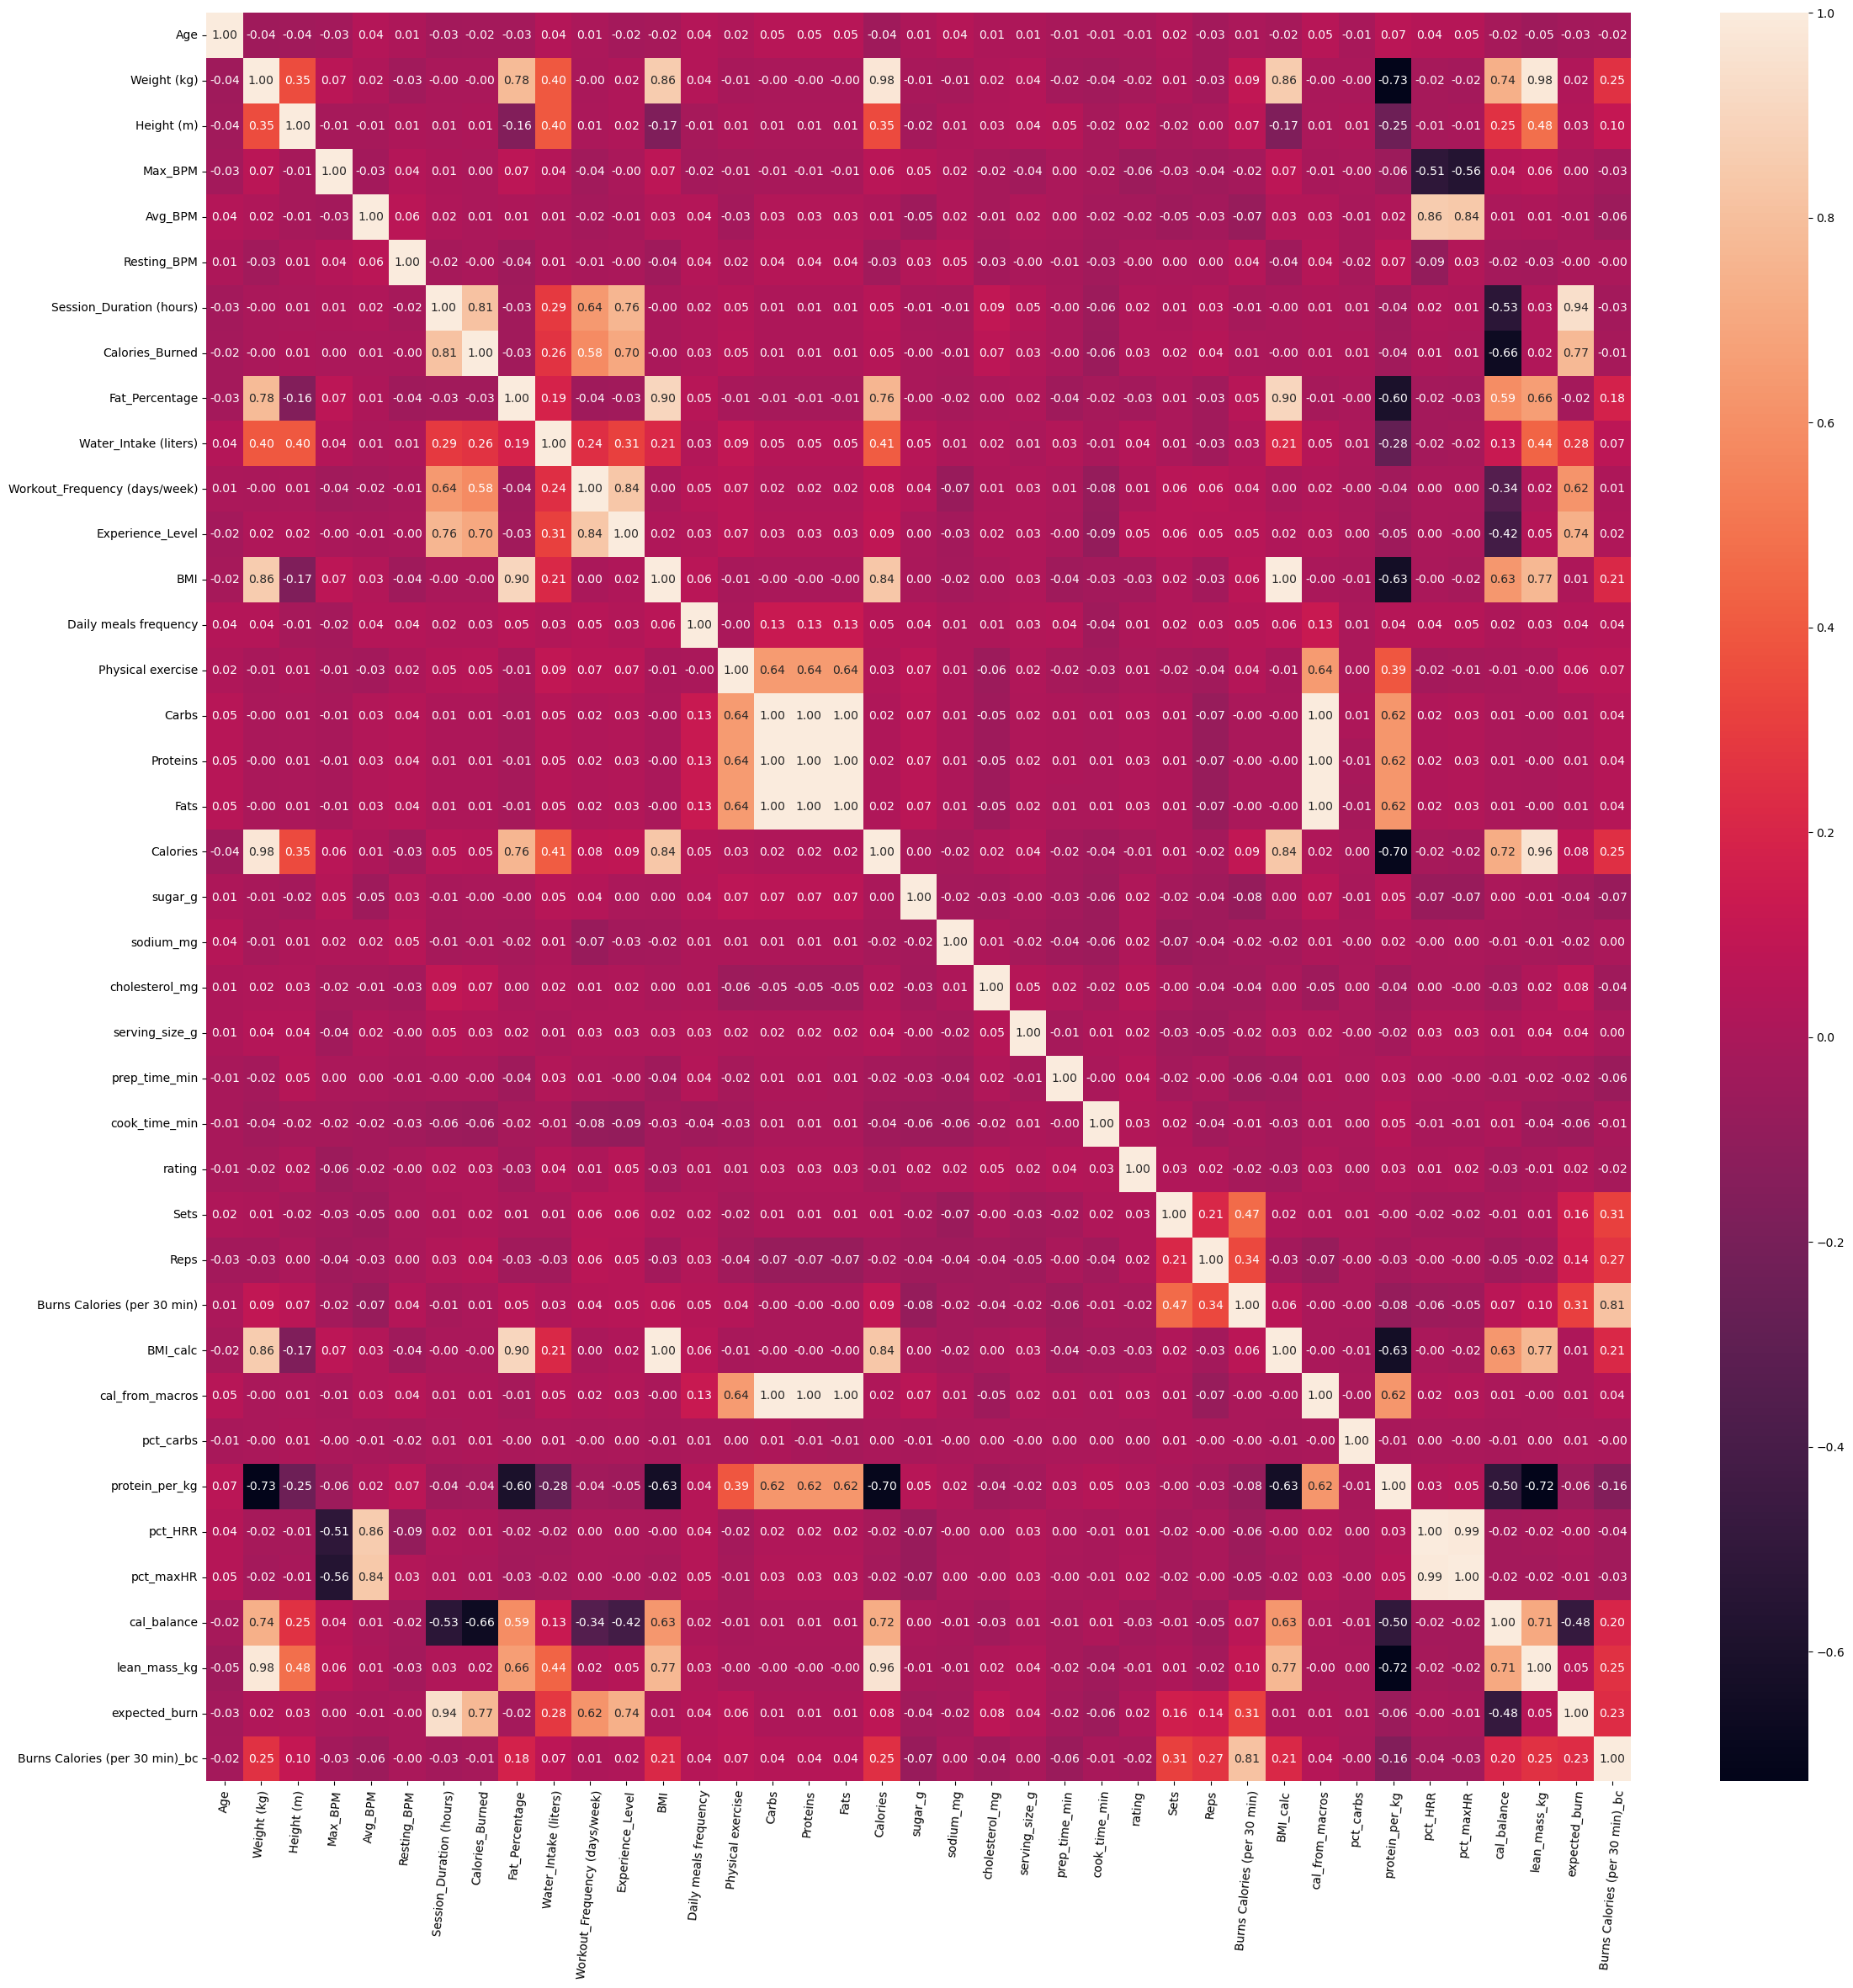

In [29]:
plt.figure(figsize=(len(numerical_columns) * 0.7, len(numerical_columns) * 0.7))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f")
plt.xticks(rotation=85)
plt.show()

In [30]:
def correlated_columns(df, threshold):
    correlated_pairs = []
    corr = df.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i, j]) > threshold:
                col1 = corr.columns[i]
                col2 = corr.columns[j]
                value = corr.iloc[i, j]
                correlated_pairs.append((col1, col2, value))
    
    result_df = pd.DataFrame(correlated_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])
    result_df = result_df.sort_values(by='Correlation', ascending=False).reset_index(drop=True)
    return result_df

In [31]:
numerical_columns = [col for col in df1.columns if df1[col].dtype != "O"]

In [32]:
correlated_columns(df1[numerical_columns], 0.85)

Feature 1                    Feature 2  Correlation
0                         BMI_calc                          BMI     1.000000
1                  cal_from_macros                        Carbs     0.999924
2                  cal_from_macros                         Fats     0.999848
3                  cal_from_macros                     Proteins     0.999803
4                             Fats                     Proteins     0.999609
5                             Fats                        Carbs     0.999608
6                         Proteins                        Carbs     0.999596
7   Burns Calories (per 30 min)_bc  Burns Calories (per 30 min)     0.990718
8                    expected_burn     Session_Duration (hours)     0.990697
9                        pct_maxHR                      pct_HRR     0.988327
10                    lean_mass_kg                  Weight (kg)     0.981419
11                        Calories                  Weight (kg)     0.977734
12                    lean_mass_kg                     Calories     0.961969
13                        BMI_calc               Fat_Percentage     0.901273
14                             BMI               Fat_Percentage     0.901272
15                         pct_HRR                      Avg_BPM     0.856095
16                             BMI                  Weight (kg)     0.851624
17                        BMI_calc                  Weight (kg)     0.851623

In [33]:
drop_columns = ["BMI_calc", "Carbs", "cal_from_macros", "Proteins", "Burns Calories (per 30 min)_bc","expected_burn", "pct_HRR", "lean_mass_kg", "Weight (kg)", "Fat_Percentage"]
df1 = df1.drop(columns=drop_columns, axis=1)

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19107 entries, 0 to 19999
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            19107 non-null  float64
 1   Gender                         19107 non-null  object 
 2   Height (m)                     19107 non-null  float64
 3   Max_BPM                        19107 non-null  float64
 4   Avg_BPM                        19107 non-null  float64
 5   Resting_BPM                    19107 non-null  float64
 6   Session_Duration (hours)       19107 non-null  float64
 7   Calories_Burned                19107 non-null  float64
 8   Workout_Type                   19107 non-null  object 
 9   Water_Intake (liters)          19107 non-null  float64
 10  Workout_Frequency (days/week)  19107 non-null  float64
 11  Experience_Level               19107 non-null  float64
 12  BMI                            19107 non-null  floa

# Independent & Dependent Features

In [35]:
X = df1.drop("Burns Calories (per 30 min)", axis=1)
y = df1["Burns Calories (per 30 min)"]

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14330, 37), (4777, 37), (14330,), (4777,))

# Encoding and Scaling

 Encoding was applied after the train-test split.
This prevents data leakage by ensuring test set statistics were not used during encoding.

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler

In [38]:
# Target mean encoding
target_means = y_train.groupby(X_train["Workout"]).mean()

X_train["Workout_Encoded"] = X_train["Workout"].map(target_means).fillna(y_train.mean())
X_test["Workout_Encoded"] = X_test["Workout"].map(target_means).fillna(y_train.mean())

X_train = X_train.drop("Workout", axis=1)
X_test = X_test.drop("Workout", axis=1)

In [39]:
# Gender: binary encoding 
X_train["Gender"] = X_train["Gender"].map({"Male": 0, "Female": 1})
X_test["Gender"] = X_test["Gender"].map({"Male": 0, "Female": 1})

In [40]:
one_hot_encoding_columns = ["Workout_Type", "meal_type", "diet_type", "cooking_method", "Body Part", "Type of Muscle"]
ordinal_encoding_columns = ["Difficulty Level" , "Burns_Calories_Bin"]

ordinal_encoder = OrdinalEncoder(categories= [
    ["Beginner" ,"Intermediate", "Advanced"],  #  Difficulty Level
    ["Low", "Medium", "High", "Very High"]   # Burns_Calories_Bin
])

In [41]:
# Scaling
scaling_columns = [
    col for col in X_train.columns
    if col not in one_hot_encoding_columns
    and col not in ordinal_encoding_columns
    and col != "Gender"
]

In [42]:
preprocessor = ColumnTransformer(
    transformers= [
        ("one_hot_cols", OneHotEncoder(drop="first", handle_unknown="ignore"), one_hot_encoding_columns),
        ("ordinal_cols", ordinal_encoder, ordinal_encoding_columns),
        ("scaling_cols", RobustScaler(), scaling_columns)

    ], remainder="passthrough"
)

X_train_enc = preprocessor.fit_transform(X_train)
X_test_enc = preprocessor.transform(X_test)

In [43]:
X_train_df = pd.DataFrame(X_train_enc, columns=preprocessor.get_feature_names_out())
X_test_df = pd.DataFrame(X_test_enc, columns=preprocessor.get_feature_names_out())

In [44]:
X_train_df.sample(7)

one_hot_cols__Workout_Type_HIIT  one_hot_cols__Workout_Type_Strength  \
8832                               0.0                                  0.0   
6460                               0.0                                  1.0   
7188                               0.0                                  0.0   
507                                1.0                                  0.0   
11301                              1.0                                  0.0   
6185                               0.0                                  0.0   
5177                               1.0                                  0.0   

       one_hot_cols__Workout_Type_Yoga  one_hot_cols__meal_type_Dinner  \
8832                               1.0                             0.0   
6460                               0.0                             0.0   
7188                               1.0                             0.0   
507                                0.0                             1.0   
11301                              0.0                             1.0   
6185                               1.0                             0.0   
5177                               0.0                             0.0   

       one_hot_cols__meal_type_Lunch  one_hot_cols__meal_type_Snack  \
8832                             1.0                            0.0   
6460                             0.0                            1.0   
7188                             0.0                            0.0   
507                              0.0                            0.0   
11301                            0.0                            0.0   
6185                             0.0                            0.0   
5177                             1.0                            0.0   

       one_hot_cols__diet_type_Keto  one_hot_cols__diet_type_Low-Carb  \
8832                            0.0                               0.0   
6460                            1.0                               0.0   
7188                            0.0                               0.0   
507                             0.0                               1.0   
11301                           0.0                               0.0   
6185                            0.0                               0.0   
5177                            0.0                               0.0   

       one_hot_cols__diet_type_Paleo  one_hot_cols__diet_type_Vegan  \
8832                             0.0                            1.0   
6460                             0.0                            0.0   
7188                             1.0                            0.0   
507                              0.0                            0.0   
11301                            1.0                            0.0   
6185                             0.0                            1.0   
5177                             0.0                            0.0   

       one_hot_cols__diet_type_Vegetarian  \
8832                                  0.0   
6460                                  0.0   
7188                                  0.0   
507                                   0.0   
11301                                 0.0   
6185                                  0.0   
5177                                  0.0   

       one_hot_cols__cooking_method_Boiled  \
8832                                   1.0   
6460                                   0.0   
7188                                   1.0   
507                                    0.0   
11301                                  0.0   
6185                                   0.0   
5177                                   0.0   

       one_hot_cols__cooking_method_Fried  \
8832                                  0.0   
6460                                  0.0   
7188                                  0.0   
507                                   1.0   
11301                                 0.0   
6185                                  0.0   
5177         

In [45]:
X_train_df.isnull().sum().sum()

np.int64(0)

In [46]:
X_test_df.isnull().sum().sum()

np.int64(0)

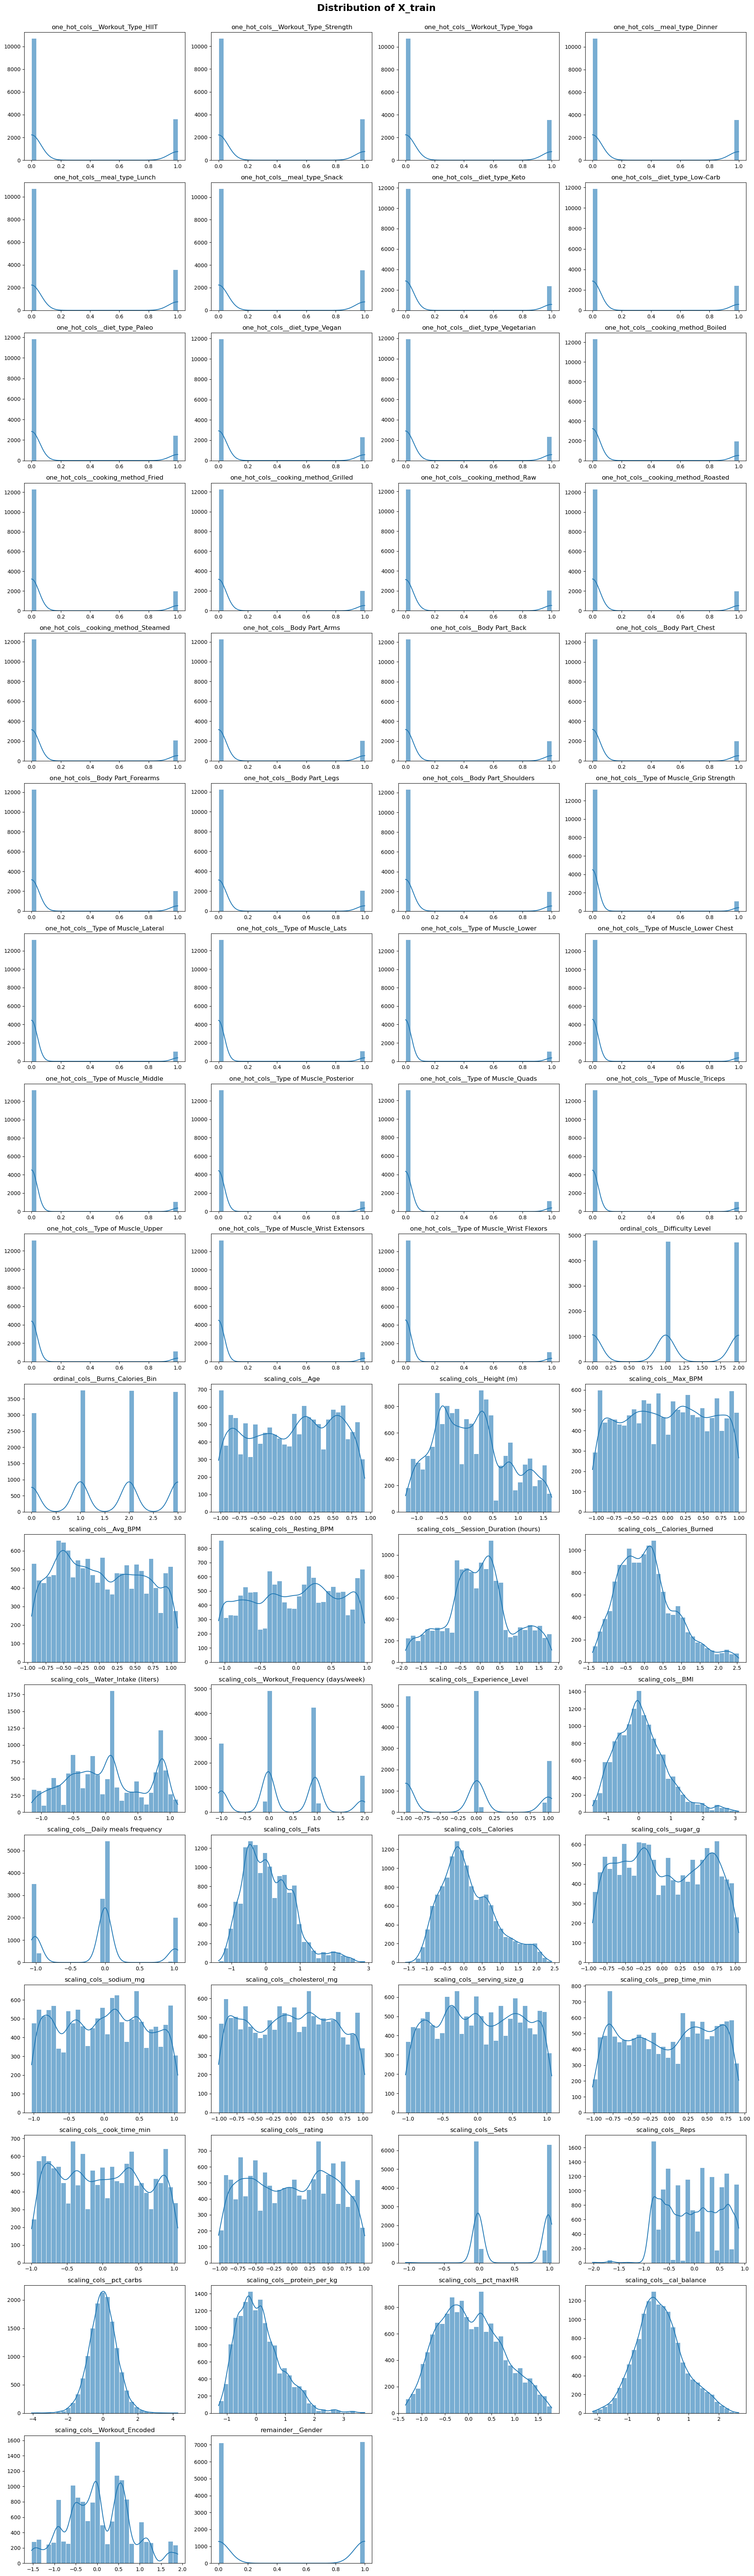

In [47]:
n_cols = 4
n_rows = math.ceil(len(X_train_df.columns) / n_cols)

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(X_train_df.columns, 1):
     plt.subplot(n_rows, n_cols, i)
     sns.histplot(data=X_train_df, x=col, kde=True, bins=30, color="#1f77b4", edgecolor="White", alpha=0.6)
     plt.title(col)
     plt.xlabel("")
     plt.ylabel("")
plt.suptitle("Distribution of X_train", fontsize=18, fontweight="bold", color="black", y=1.0)
plt.tight_layout()
plt.show()

In [48]:
X_train_df.describe()

one_hot_cols__Workout_Type_HIIT  one_hot_cols__Workout_Type_Strength  \
count                     14330.000000                         14330.000000   
mean                          0.252338                             0.253873   
std                           0.434369                             0.435241   
min                           0.000000                             0.000000   
25%                           0.000000                             0.000000   
50%                           0.000000                             0.000000   
75%                           1.000000                             1.000000   
max                           1.000000                             1.000000   

       one_hot_cols__Workout_Type_Yoga  one_hot_cols__meal_type_Dinner  \
count                     14330.000000                    14330.000000   
mean                          0.250384                        0.249895   
std                           0.433249                        0.432967   
min                           0.000000                        0.000000   
25%                           0.000000                        0.000000   
50%                           0.000000                        0.000000   
75%                           1.000000                        0.000000   
max                           1.000000                        1.000000   

       one_hot_cols__meal_type_Lunch  one_hot_cols__meal_type_Snack  \
count                   14330.000000                   14330.000000   
mean                        0.251849                       0.250035   
std                         0.434090                       0.433048   
min                         0.000000                       0.000000   
25%                         0.000000                       0.000000   
50%                         0.000000                       0.000000   
75%                         1.000000                       0.750000   
max                         1.000000                       1.000000   

       one_hot_cols__diet_type_Keto  one_hot_cols__diet_type_Low-Carb  \
count                  14330.000000                      14330.000000   
mean                       0.168109                          0.169923   
std                        0.373976                          0.375578   
min                        0.000000                          0.000000   
25%                        0.000000                          0.000000   
50%                        0.000000                          0.000000   
75%                        0.000000                          0.000000   
max                        1.000000                          1.000000   

       one_hot_cols__diet_type_Paleo  one_hot_cols__diet_type_Vegan  \
count                   14330.000000                   14330.000000   
mean                        0.172435                       0.163782   
std                         0.377772                       0.370091   
min                         0.000000                       0.000000   
25%                         0.000000                       0.000000   
50%                         0.000000                       0.000000   
75%                         0.000000                       0.000000   
max                         1.000000                       1.000000   

       one_hot_cols__diet_type_Vegetarian  \
count                        14330.000000   
mean                             0.165457   
std                              0.371606   
min                              0.000000   
25%                              0.000000   
50%                              0.000000   
75%                              0.000000   
max                              1.000000   

       one_hot_cols__cooking_method_Boiled  \
count                         14330.000000   
mean                              0.137962   
std                               0.344872   
min                               0.000000   
25%                               0.000000   
50%     

# Regression Models

In [49]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [50]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)

    return mae, rmse, r2_square

In [51]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "LassoCV": LassoCV(),
    "Ridge": Ridge(),
    "RidgeCV": RidgeCV(),
    "ElasticNet": ElasticNet(),
    "ElasticNetCV": ElasticNetCV(),
    "SVR": SVR(),
    "K Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Adaboost Regressor": AdaBoostRegressor(),
    "Gradient Boost Regressor": GradientBoostingRegressor(),
    "XGBoost Regressor": XGBRegressor(),
    "LightGBM Regressor": LGBMRegressor()
}

In [52]:
def evaluate_models(models, X_train, y_train, X_test, y_test, evaluate_fn):
    """
    Trains the given models, makes predictions, and returns evaluation metrics.

    Parameters:
    - models: dict, model name → model instance
    - X_train, y_train: training data
    - X_test, y_test: test data
    - evaluate_fn: callable, (y_true, y_pred) → (mae, rmse, r2)

    Returns:
    - pd.DataFrame: table containing evaluation metrics for each model
    """
    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        mae_train, rmse_train, r2_train = evaluate_fn(y_train, y_train_pred)
        mae_test, rmse_test, r2_test = evaluate_fn(y_test, y_test_pred)

        results.append({
            "Model": name,
            "Train MAE": mae_train,
            "Train RMSE": rmse_train,
            "Train R2": r2_train,
            "Test MAE": mae_test,
            "Test RMSE": rmse_test,
            "Test R2": r2_test
        })

    return pd.DataFrame(results)

evaluate_df = evaluate_models(models, X_train_enc, y_train, X_test_enc, y_test, evaluate_model)
evaluate_df

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000895 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5745
[LightGBM] [Info] Number of data points in the train set: 14330, number of used features: 66
[LightGBM] [Info] Start training from score 350.022467


Model     Train MAE    Train RMSE  Train R2  Test MAE  \
0          Linear Regression  2.991939e+00  3.658566e+00  0.920578  2.988377   
1                      Lasso  3.092274e+00  3.919724e+00  0.908835  3.097264   
2                    LassoCV  2.998294e+00  3.665691e+00  0.920269  2.983283   
3                      Ridge  2.992001e+00  3.658573e+00  0.920578  2.988390   
4                    RidgeCV  2.992190e+00  3.658802e+00  0.920568  2.988294   
5                 ElasticNet  4.291850e+00  5.396153e+00  0.827223  4.248315   
6               ElasticNetCV  2.992108e+00  3.669623e+00  0.920097  2.974316   
7                        SVR  2.235363e+00  3.229439e+00  0.938117  2.509584   
8      K Neighbors Regressor  5.675373e-01  8.430024e-01  0.995783  0.725308   
9              Decision Tree  1.190023e-17  8.224656e-16  1.000000  0.783479   
10   Random Forest Regressor  2.194345e-01  3.089290e-01  0.999434  0.578048   
11        Adaboost Regressor  2.930004e+00  3.431650e+00  0.930125  2.946514   
12  Gradient Boost Regressor  2.302466e+00  2.789204e+00  0.953839  2.331947   
13         XGBoost Regressor  4.944122e-01  6.702558e-01  0.997334  0.793513   
14        LightGBM Regressor  9.564103e-01  1.317586e+00  0.989699  1.054157   

    Test RMSE   Test R2  
0    3.699160  0.919674  
1    3.978569  0.907082  
2    3.692461  0.919965  
3    3.699067  0.919679  
4    3.698772  0.919691  
5    5.406688  0.828403  
6    3.694288  0.919886  
7    3.509843  0.927686  
8    1.092233  0.992997  
9    1.191367  0.991668  
10   0.851733  0.995742  
11   3.454617  0.929944  
12   2.835758  0.952795  
13   1.153850  0.992185  
14   1.465917  0.987386

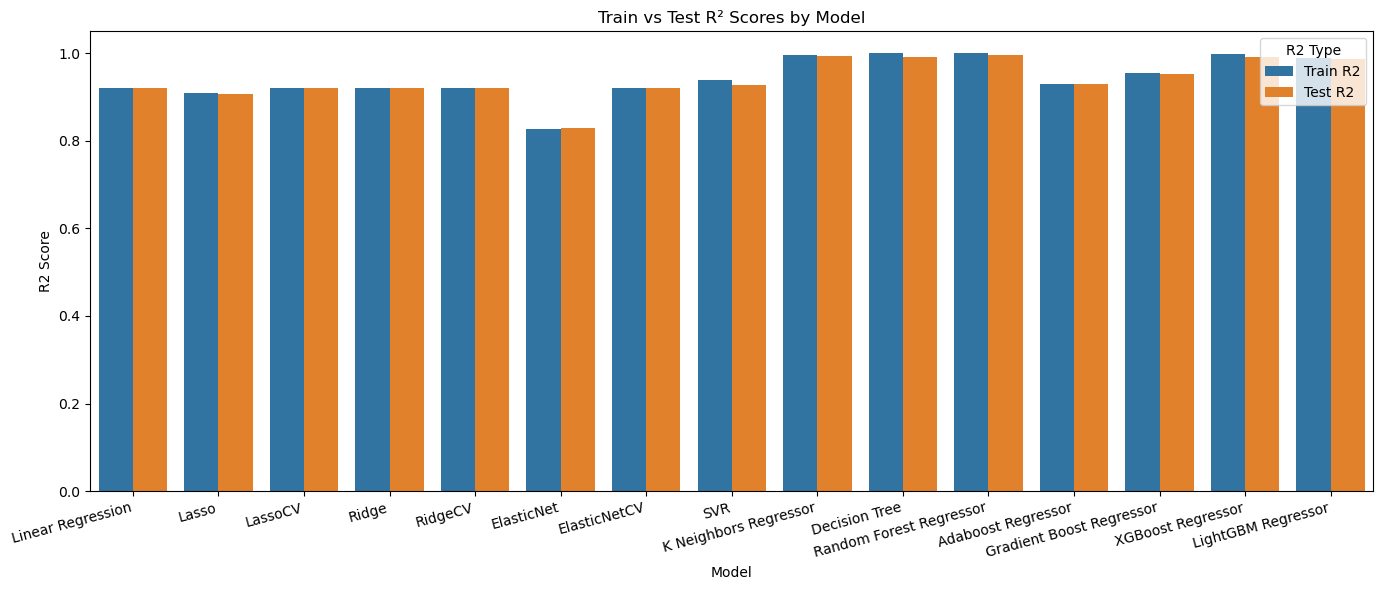

In [53]:
df_melted = evaluate_df.melt(id_vars='Model', value_vars=['Train R2', 'Test R2'],
                             var_name='R2 Type', value_name='R2 Score')

plt.figure(figsize=(14, 6))
sns.barplot(data=df_melted, x='Model', y='R2 Score', hue='R2 Type')

plt.xticks(rotation=45, ha='right')
plt.title('Train vs Test R² Scores by Model')
plt.xlabel("Model")
plt.tight_layout()
plt.show()

# Hyperparameter Tuning

In [54]:
from sklearn.model_selection import RandomizedSearchCV

In [55]:
models_for_hyperparameter = {
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "SVR": SVR(),
    "K Neighbors Regressor": KNeighborsRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Adaboost Regressor": AdaBoostRegressor(),
    "Gradient Boost Regressor": GradientBoostingRegressor(),
    "XGBoost Regressor": XGBRegressor(),
    "LightGBM Regressor": LGBMRegressor()
}

In [56]:
params = {
    'Ridge': {"alpha": [0.1, 1.0, 10.0, 100.0]},
    'Lasso': {'alpha': [0.001, 0.01, 0.1, 1.0]},
    'SVR':   {'C' : [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.001],
              'kernel' : ["rbf", "linear"]},
    
    'K Neighbors Regressor': {'n_neighbors': [3, 5, 7, 9],
                            'weights': ['uniform', 'distance']},
    
    'DecisionTreeRegressor': {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                              'splitter': ['best', 'random'],
                              'max_depth': [None, 5, 10, 20],
                              
                              'max_features': ['sqrt', 'log2', None]},
    'Adaboost Regressor' : {"n_estimators": [50, 80, 100, 120],
                            "learning_rate": [0.001, 0.01, 0.1, 1.0, 2.0],
                            "loss": ["linear", "square", "exponential"]},
    
    'Gradient Boost Regressor': {"n_estimators" : [100, 150, 200],
                                "max_depth" : [3,4,5],
                                "loss" : ["squared_error", "absolute_error", "huber", "quantile"],
                                "learning_rate" : [0.01, 0.1, 0.5]},
    
    'XGBoost Regressor': {"learning_rate": [0.1, 0.01],
                        "max_depth": [5,8,12,20,30],
                        "n_estimators": [100,200,300,500],
                        "colsample_bytree": [0.3, 0.4, 0.5, 0.7, 1]},
    
    'LightGBM Regressor': {"num_leaves": [31,50,70],
                            "max_depth": [-1, 5, 10],
                            "learning_rate": [0.01, 0.05, 0.1],
                            "n_estimators": [100, 300, 1000],
                            "min_child_samples": [10,20,30],
                            "subsample": [0.6, 0.8, 1.0],
                            "colsample_bytree": [0.6, 0.8, 1.0],
                            "reg_alpha": [0, 0.5, 1.0],
                            "reg_lambda": [0, 0.5, 1.0]}
}

In [57]:
optimized_models = {}

for name, model in models_for_hyperparameter.items():
    if name not in params:
        print(f"No parameter definition for {name}, skipping.")
        continue

    print(f"Starting RandomizedSearchCV for {name}...")

    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=params[name],
        n_iter=20,  
        scoring='r2',
        cv=5,
        random_state=42,
        n_jobs=-1
    )

    search.fit(X_train_enc, y_train)
    optimized_models[name] = search.best_estimator_

# Evaluate optimized models
evaluate_optimized_df = evaluate_models(optimized_models, X_train_enc, y_train, X_test_enc, y_test, evaluate_model)
evaluate_optimized_df

Starting RandomizedSearchCV for Ridge...
Starting RandomizedSearchCV for Lasso...
Starting RandomizedSearchCV for SVR...
Starting RandomizedSearchCV for K Neighbors Regressor...
Starting RandomizedSearchCV for DecisionTreeRegressor...
No parameter definition for Random Forest Regressor, skipping.
Starting RandomizedSearchCV for Adaboost Regressor...
Starting RandomizedSearchCV for Gradient Boost Regressor...
Starting RandomizedSearchCV for XGBoost Regressor...
Starting RandomizedSearchCV for LightGBM Regressor...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001837 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5745
[LightGBM] [Info] Number of data points in the train set: 14330, number of used features: 66
[LightGBM] [Info] Start training from score 350.022467
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001443 seconds.
You can set `force_col_wise=true`

Model     Train MAE    Train RMSE  Train R2  Test MAE  \
0                     Ridge  2.992001e+00  3.658573e+00  0.920578  2.988390   
1                     Lasso  2.996988e+00  3.663401e+00  0.920368  2.985050   
2                       SVR  2.399039e+00  3.299633e+00  0.935398  2.569356   
3     K Neighbors Regressor  1.669428e-08  4.094945e-08  1.000000  0.659195   
4     DecisionTreeRegressor  0.000000e+00  0.000000e+00  1.000000  0.786559   
5        Adaboost Regressor  2.894085e+00  3.374758e+00  0.932422  2.891732   
6  Gradient Boost Regressor  4.822839e-01  6.396599e-01  0.997572  0.932553   
7         XGBoost Regressor  1.199363e-02  1.759767e-02  0.999998  0.611193   
8        LightGBM Regressor  2.104920e-01  2.871415e-01  0.999511  0.664182   

   Test RMSE   Test R2  
0   3.699067  0.919679  
1   3.693266  0.919930  
2   3.483718  0.928758  
3   0.967913  0.994501  
4   1.196005  0.991603  
5   3.377683  0.933029  
6   1.421912  0.988132  
7   0.877802  0.995477  
8   0.935940  0.994858

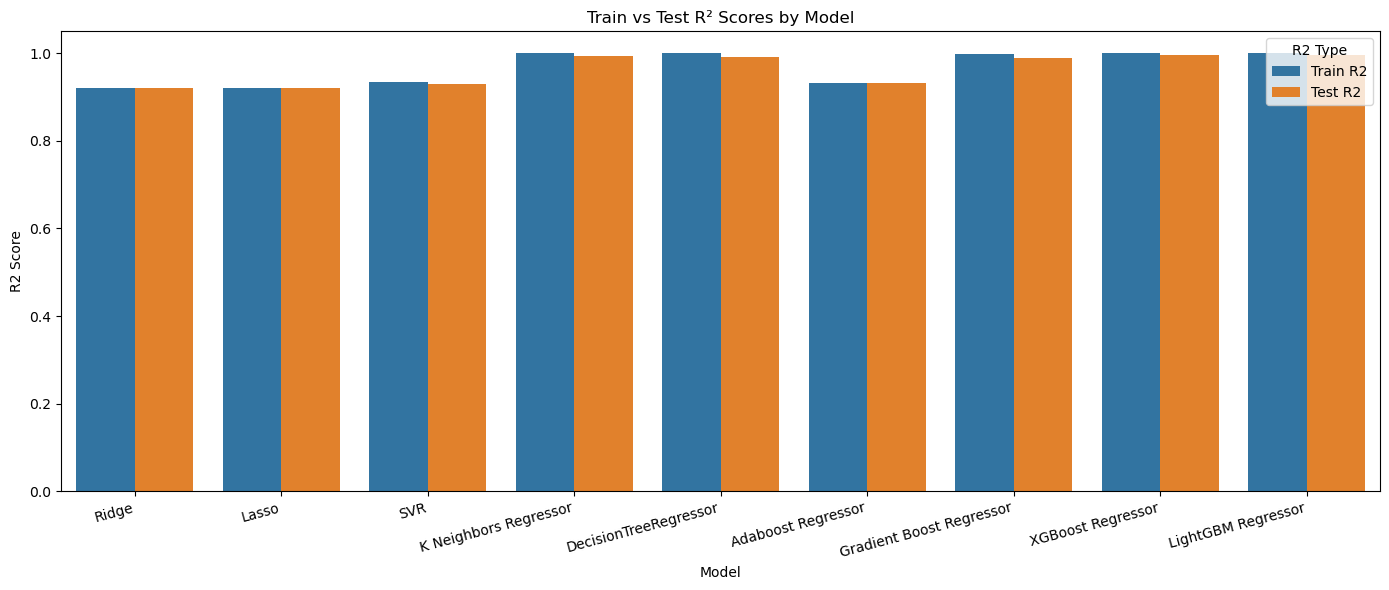

In [58]:
df_melted = evaluate_optimized_df.melt(id_vars='Model', value_vars=['Train R2', 'Test R2'],
                             var_name='R2 Type', value_name='R2 Score')

plt.figure(figsize=(14, 6))
sns.barplot(data=df_melted, x='Model', y='R2 Score', hue='R2 Type')

plt.xticks(rotation=15, ha='right')
plt.title('Train vs Test R² Scores by Model')
plt.xlabel("Model")
plt.tight_layout()
plt.show()

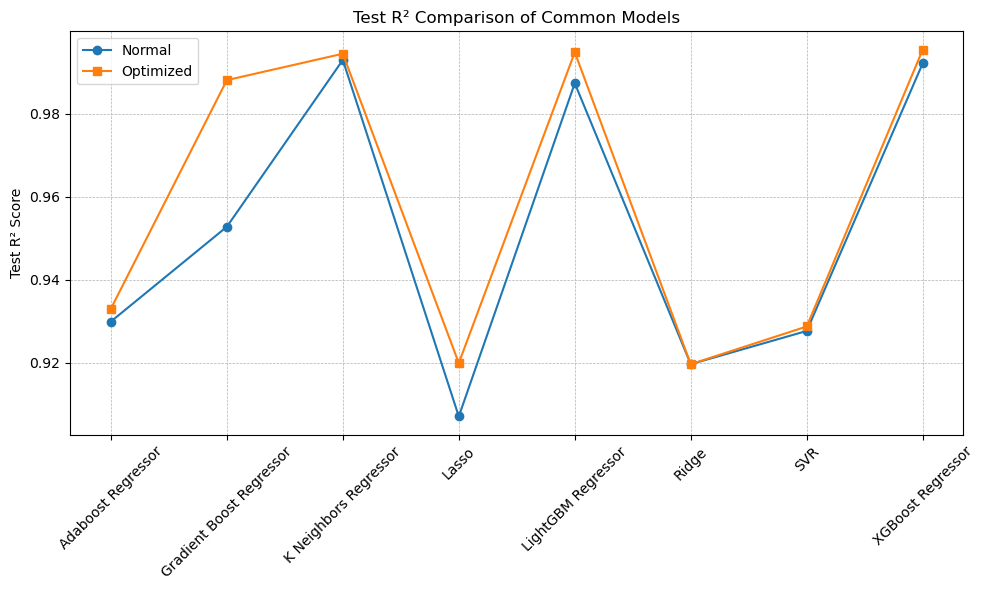

In [60]:
# Find common models
common_models = set(evaluate_df['Model']).intersection(set(evaluate_optimized_df['Model']))

# Filter and sort common models
base = evaluate_df[evaluate_df['Model'].isin(common_models)].set_index('Model').loc[sorted(common_models)]
opt = evaluate_optimized_df[evaluate_optimized_df['Model'].isin(common_models)].set_index('Model').loc[sorted(common_models)]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(base.index, base['Test R2'], marker='o', label='Normal')
plt.plot(opt.index, opt['Test R2'], marker='s', label='Optimized')
plt.xticks(rotation=45)
plt.ylabel('Test R² Score')
plt.title('Test R² Comparison of Common Models')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# In Conclusion

In this project, we conducted a comprehensive regression analysis on a rich lifestyle dataset containing 20,000 entries and 54 features related to health, nutrition, and exercise. The goal was to predict the number of calories burned per 30 minutes of workout using various personal and behavioral attributes.

 #### Exploratory Data Analysis (EDA)
   In this project, the exploratory data analysis involved separating numerical and categorical variables and examining their distributions. Factors such as exercise types, dietary preferences, and physiological metrics were visualized to understand their impact on calorie burn. The dataset was confirmed to have no missing or duplicate records, and various plots were used to analyze relationships between age, gender, experience level, and activity frequency.

 #### Outlier Detection
Following the exploratory data analysis, an outlier analysis was performed using the IQR method to detect extreme values across numerical features. Special attention was given to the target variable Burns Calories (per 30 min), where outliers were identified and removed to ensure cleaner input for modeling. The refined dataset (df1) was then used for all subsequent steps.

 #### Correlation Anlaysis
 To examine the relationships between numerical variables in the dataset, a correlation analysis was conducted. Variable pairs with a correlation coefficient above 0.85 were identified to assess the risk of multicollinearity. For instance, features such as BMI and BMI_calc, or cal_from_macros and Carbs/Fats/Proteins showed near-perfect correlations and were therefore removed from the dataset. This step helped eliminate redundant information and resulted in a cleaner, more consistent, and efficient data structure for the modeling process.

 #### Encoding & Scaling
Encoding operations were applied after the train-test split to prevent data leakage while converting categorical variables into numerical form. In this process, the gender variable was transformed using binary encoding (Male=0, Female=1), and the Workout feature was encoded using target mean encoding based on the average target values. One-hot encoding was used for nominal categories (Workout_Type, meal_type, diet_type, cooking_method, Body Part, Type of Muscle), while ordinal encoding was applied to ordered categories (Difficulty Level, Burns_Calories_Bin). To address scale differences among numerical features, RobustScaler was used for scaling, ensuring a more balanced and efficient learning process for the model
 
 #### Model Training & Evaluation
During the modeling phase, various regression algorithms were employed to predict the target variable “Burns Calories (per 30 min).” Models such as Linear Regression, Ridge, Lasso, SVR, Decision Tree, Random Forest, Gradient Boosting, XGBoost, and LightGBM were trained and evaluated. Each model’s performance was assessed using MAE, RMSE, and R² metrics, and the results were visualized for comparison. Notably, models like Random Forest, XGBoost, and K Neighbors Regressor achieved exceptionally high R² scores (above 0.99) on the test set, indicating a strong fit to the data. This comprehensive modeling process enabled the identification of the most effective algorithms and maximized prediction accuracy


 #### Hyperparameter Tuning
We applied RandomizedSearchCV to optimize hyperparameters across 10 regression models. The use of cross-validation not only helped find the best parameter combinations but also ensured that the models were generalizable to unseen data. As a result, models like XGBoost and LightGBM achieved R² scores above 0.99, showing excellent predictive power.